In [7]:
%pylab inline
from numpy import loadtxt
import sys, os
nb_directory = os.getcwd()
print(nb_directory)
sys.path.insert(0, os.path.join(nb_directory, '..'))
#from wz_geom import wz #we got error 

Populating the interactive namespace from numpy and matplotlib
/Users/mariannejbr/Dropbox/Cosmology/f-r-chi2/codigo-f_R/notebooks


In [8]:
class FancyFormatter(Formatter):
    """Formater for values with LaTeX fonts."""

    def __call__(self, v, pos=None):
        return r'${:.5G}$'.format(v)

    def format_data_short(self, value):
        return '{:.1f}'.format(value)

In [9]:
figspath = './../../../../f_R-Chi2/code-chi2-bao-sneia-shared/figures/'

In [10]:
modelspath = './../Input/'
husawicki = np.loadtxt(modelspath+'HS.dat', usecols=(1,2))
expmodel = np.loadtxt(modelspath+'EXP.dat', usecols=(0,2))
starobinsky = np.loadtxt(modelspath+'Sta.dat', usecols=(1,2))

In [20]:
HSfit = np.array([0.0510, 0.3552, 1.0864, 4.3566])
Stfit = np.array([0.1163, 0.0712, 0.9682, 4.4907])
Expfit = np.array([0.3416, 0.0008, 0.9396,9.7464])

0.050999999999999997

In [21]:
def wz(z, w_params):
    """
    -1 + (w0 / (1 + (w1) * z ** (w3))) * cos(z + w2)
    EoS for parametrizing f(R) behaviour
    w(z) = -1
    :param w3:
    """
    w0, w1, w2, w3 = w_params

    if w0 == 0:
        return -1

    if w3 == 0:
        return -1 + w0 / (1 + w1) * np.cos(z + w2)

    if w1 == 0:
        return -1 + w0 * np.cos(z + w2)

    return -1 + (w0 / (1 + (w1) * z ** (w3))) * np.cos(z + w2)

wzvec = np.vectorize(wz, excluded=(1, 2, 3, 4))

In [26]:
#models

wzHSfit = wzvec(husawicki[:,0],HSfit)
wzEXPfit = wzvec(expmodel[:,0], Expfit)
wzSTAfit = wzvec(starobinsky[:,0], Stfit)

In [39]:
#colors
dark_pink = '#800080'
light_pink = '#FFB3FF'

dark_blue = '#003366'
light_blue = '#99CCFF'

dark_orange = '#FF8000'
light_orange = '#FFBF80'

dark_green = '#208000'
light_green = '#C6FFB3'

dark_red = '#7D172E'
medium_red = '#A11D3B'
bright_red='#EC5766'
light_red = '#DEA6A6'


dark_purple = '#3E3168'
dark_violet='#561643'
medium_purple = '#54428E'#'#726DA8'
light_purple = '#8B87B7'#'#A5A2C7'#'#7D8CC4'

colors = [
        [dark_purple, dark_purple, medium_purple, light_purple],
        [dark_red, dark_red, medium_red, bright_red, light_red],
        ['darkblue', 'navy', 'mediumblue','cornflowerblue',
         'steelblue'],
        [dark_orange, light_orange],
        [dark_pink, light_pink],
        [dark_green, light_green]
    ]


purples = colors[0]
reds = colors[1]
blues = colors[2]
reds2 = ['firebrick', 'firebrick', dark_red, 'tomato']

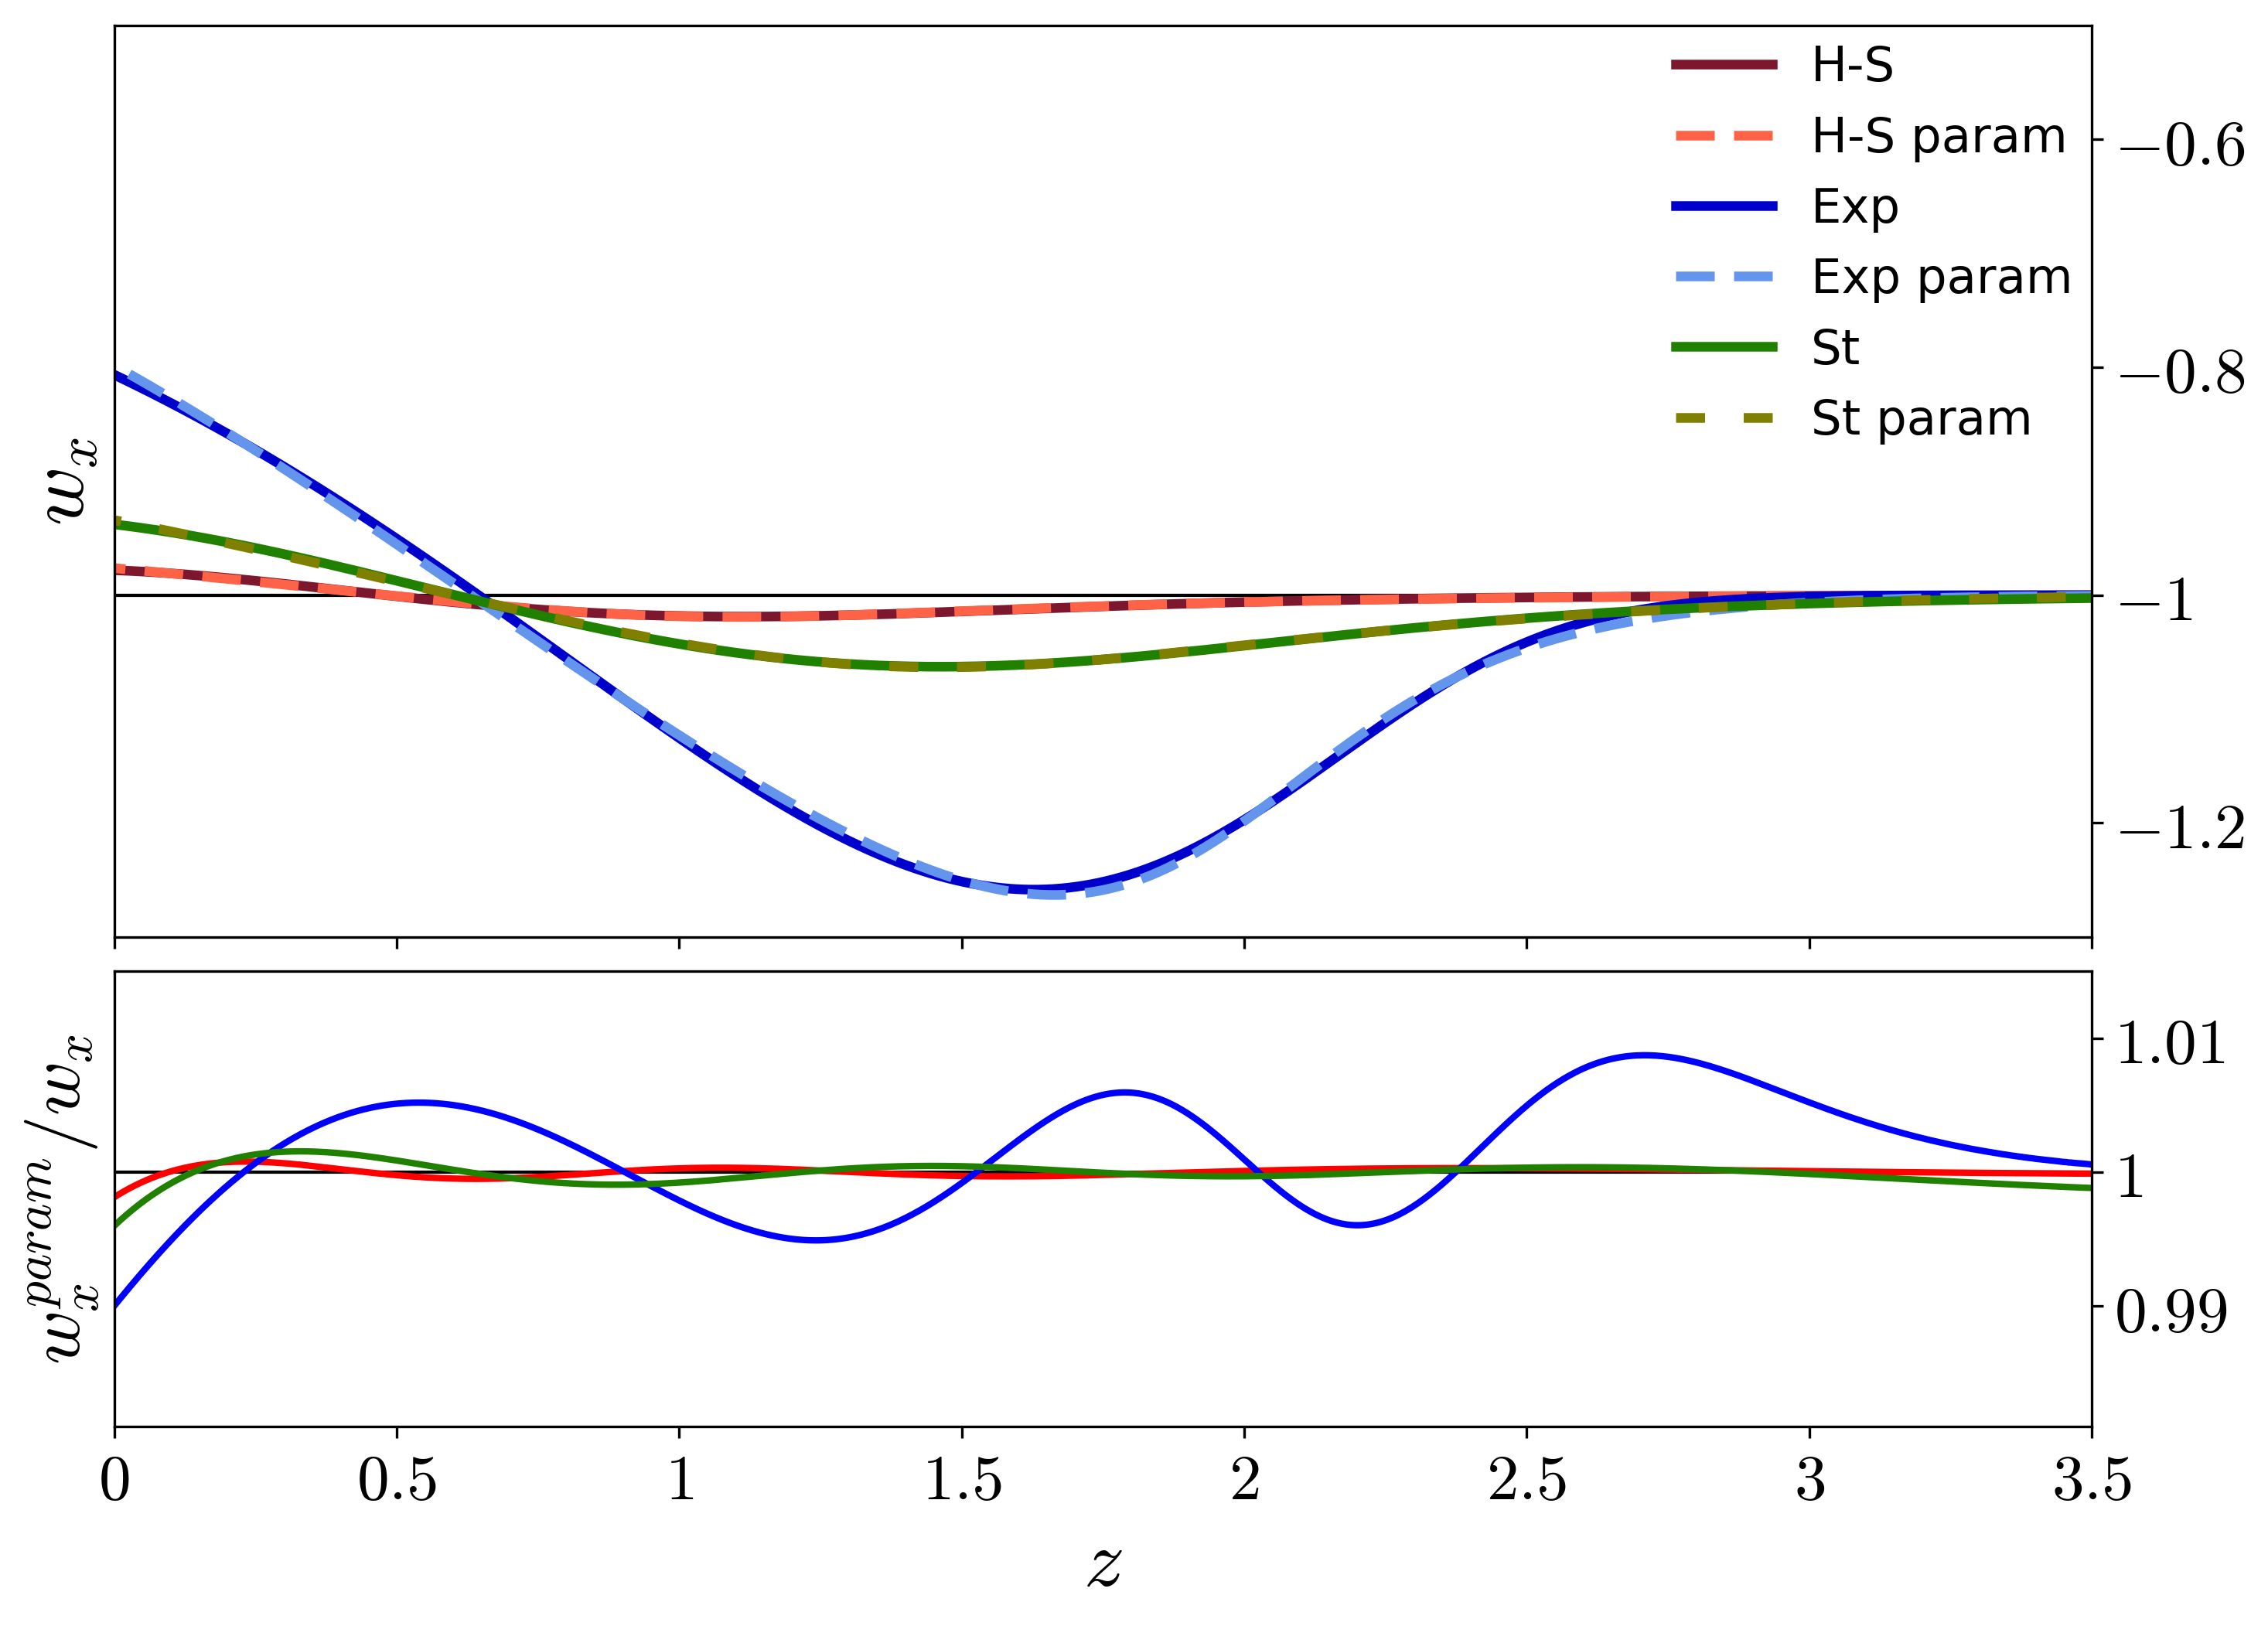

In [73]:
# Size in inches, and dots per inch
figsize = (11, 8)
dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset'] = 'cm'

figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.05)

### upper panel
subplot(grid_spec[0])
cax = gca()

plt.axhline(y = -1, ls='-', lw=1, color='k')

cax.plot(husawicki[:,0], husawicki[:,1],
         color =dark_red, lw=3,label=r'H-S')
cax.plot(husawicki[:,0], wzHSfit, 
         color='tomato', lw=3,ls='--', dashes=[4,2],
         label=r'H-S param')
    
    
cax.plot(expmodel[:,0], expmodel[:,1], 
         color= 'mediumblue', lw=3, label=r'Exp')
cax.plot(expmodel[:,0], wzEXPfit, 
         color='cornflowerblue', lw=3,ls='--', dashes=[4,2], 
         label=r'Exp param')

cax.plot(starobinsky[:,0], starobinsky[:,1], 
         color=dark_green,lw=3, label=r'St' )
cax.plot(starobinsky[:,0], wzSTAfit,
         color='olive',lw=3,ls='--', dashes=[3,4], 
         label=r'St param')

plt.legend(loc='best', borderaxespad=0.,prop={'size':15}, frameon=False)

xmin, xmax = 0,3.5
#ymin, ymax = -1.3, -0.5


ylabel(r'$w_x$', fontsize=25)
xlabel(r'$z$', fontsize=25)

cax.set_xlim(xmin, xmax)
cax.set_ylim(ymin, ymax)
cax.yaxis.set_ticks_position('right')
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())

cax.xaxis.set_ticklabels([], minor=True)
cax.xaxis.set_ticklabels([])


############# Second subplot ###############
cax2 = subplot(grid_spec[1])
plt.axhline(y = 1, ls='-', lw=1, color='k')
cax2.plot(husawicki[:,0], (wzHSfit)/husawicki[:,1],  color="red")
cax2.plot(expmodel[:,0], (wzEXPfit)/expmodel[:,1],  color="blue")
cax2.plot(starobinsky[:,0], (wzSTAfit)/starobinsky[:,1],  color=dark_green)

cax2.yaxis.set_ticks_position('right')

cax2.xaxis.set_major_formatter(FancyFormatter())
cax2.yaxis.set_major_formatter(FancyFormatter())
cax2.set_xlim(xmin, xmax)
cax2.set_ylim(0.981,1.015)

cax2.set_xlabel(r'$z$', fontsize=25)
cax2.set_ylabel(r'$w_x^{param}/w_x$', fontsize=23)


savefig(figspath+'models-ratios.pdf', bbox_inches='tight')